In [1]:
# Goal: extract cell growth rates from segmentation mask of ablated cell and its neighbors
# Ablated cell and neighbor are tracked manually

In [28]:
import numpy as np
import pandas as pd
from skimage import io
import matplotlib.pyplot as plt

In [29]:
dirname = '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/'

In [30]:
# to initiate a list
imseries = []
# Loop through the timeframes
for i in range(4):
    # Construct the actual filename to load
    filename = dirname + 'Region 2/t'+ str(i) +'_cp_masks.tif'
    print(filename)
    # Load the image into a matrix
    im = io.imread(filename)
    # Append the new image into the list of images
    imseries.append(im)

/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t0_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t1_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t2_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t3_cp_masks.tif


/Users/aliyafisher/anaconda3/envs/python39/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


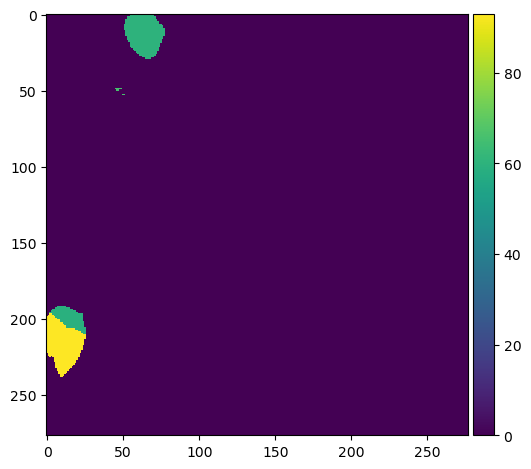

In [31]:
im = imseries[1]
io.imshow(im[49,...])

In [32]:
#pixelcount function 
def pixelcount (Image, label):
    A=Image==label
    return np.sum (A)

In [33]:
#loading excel files
excelname= dirname + 'ablation timepoints.xlsx'
annotations = pd.read_excel(excelname,index_col=0,sheet_name='R2')
colnames = annotations.index
print(annotations)
len(colnames)

            t0    t1     t2     t3    Notes          Position
Cell names                                                   
a           68  63.0  104.0  156.0      NaN            bottom
b           81  71.0   68.0  152.0      NaN  counterclockwise
c           80  76.0   93.0  167.0      NaN               NaN
d           58  51.0  110.0  139.0  divided               NaN
e           72  67.0  111.0  165.0      NaN               NaN
f           74  69.0   67.0   92.0      NaN               NaN
g           92  83.0   85.0  155.0      NaN               NaN
h           87  84.0   96.0  144.0  Bad seg               NaN
i           88  77.0   95.0  169.0      NaN               NaN
dead cell   67   NaN    NaN    NaN      NaN               NaN


10

In [34]:
cellvolumes = np.zeros((4,len(colnames)))
for i,cellname in enumerate(colnames):
    for j,time in enumerate(['t0','t1','t2','t3']):
        cellvolumes[j,i]= pixelcount(imseries[j] , annotations.loc[cellname, time])
cellvolumes

array([[12522.,  8906.,  8693., 25872., 15978., 10926., 12590., 10386.,
         7668., 29111.],
       [21812.,  9548.,  9268., 26345., 15808., 10887., 12979., 10655.,
         7718.,     0.],
       [10546.,  8892.,  8041.,  9847., 10162.,  9886., 10884.,  9008.,
         5287.,     0.],
       [11678., 10541., 11910.,  8284., 14475., 11831.,  8181., 10045.,
         5678.,     0.]])

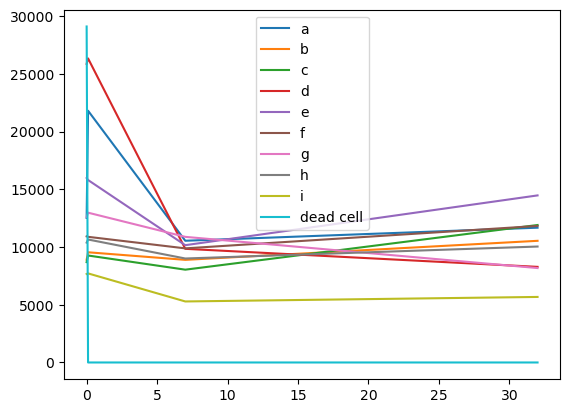

In [35]:
timestamps = [0, 0.1, 7, 32]
plt.plot(timestamps,cellvolumes); plt.legend(colnames)

In [36]:
#all file names 
imseries = []
# Loop through the timeframes
for i in range(4):
    for j in range (1,4):
    # Construct the actual filename to load
        filename = dirname + 'Region ' + str(j) + '/' + 't'+ str(i) +'_cp_masks.tif'
        print(filename)
    # Load the image into a matrix
    im = io.imread(filename)
    # Append the new image into the list of images
    imseries.append(im)

/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 1/t0_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t0_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 3/t0_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 1/t1_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t1_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 3/t1_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 1/t2_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t2_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 3/t2_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 1/t3_cp_masks.tif
/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t3_cp_masks.tif
/Users/aliyafisher/On

In [37]:
#building a dictionary
A={'b':1,'a':'c',('a','b'):'d'}
A[('a','b')]
for i in range(1):
    A[i] = 'A'
A

{'b': 1, 'a': 'c', ('a', 'b'): 'd', 0: 'A'}

In [38]:
#dictionary with all the files
files ={}
for i in range (4):
    for j in range (1,4):
        files[(i, j)]= dirname + 'Region ' + str(j) + '/' + 't'+ str(i) +'_cp_masks.tif'
print (files)

{(0, 1): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 1/t0_cp_masks.tif', (0, 2): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t0_cp_masks.tif', (0, 3): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 3/t0_cp_masks.tif', (1, 1): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 1/t1_cp_masks.tif', (1, 2): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t1_cp_masks.tif', (1, 3): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 3/t1_cp_masks.tif', (2, 1): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 1/t2_cp_masks.tif', (2, 2): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 2/t2_cp_masks.tif', (2, 3): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 3/t2_cp_masks.tif', (3, 1): '/Users/aliyafisher/OneDrive - Stanford/07-17-2023 Ablation test/Region 1/t3_cp_masks.tif',

In [39]:
#building an array with predefined size
cellvolumes = np.zeros((4,6))
for i,cellname in enumerate(['a','b','c','d','e','f']):
    for j,time in enumerate(['t0','t1','t2','t3']):
        cellvolumes[j,i]= pixelcount(imseries[j] , annotations.loc[cellname, time])
cellvolumes

array([[10868.,  8661.,   811., 10303., 16868.,  8610.],
       [ 4297.,  3059.,  2458.,  7186.,  7381.,  1891.],
       [   32., 11705.,    23., 10395.,    81.,  7339.],
       [    0.,     0.,     0.,     0.,     0.,    67.]])

In [40]:
for i in range (1,4):
    annotations = pd.read_excel(excelname,index_col=0,sheet_name='R'+str(i))
    colnames = annotations.index
    print (colnames)
    len(colnames)

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'dead cell'], dtype='object', name='Cell names')
Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'dead cell'], dtype='object', name='Cell names')
Index(['a', 'b', 'c', 'd', 'e', 'f', 'lucky cell'], dtype='object', name='Cell names')


In [41]:
files[i,j]
colnames = annotations.index

In [42]:
for k in range (1,4):
    annotations = pd.read_excel(excelname,index_col=0,sheet_name='R'+str(k))
    colnames = annotations.index
    cellvolumes = np.zeros((4,len(colnames)))
    for i,cellname in enumerate(colnames):
        for j,time in enumerate(['t0','t1','t2','t3']):
            cellvolumes[j,i]= pixelcount(io.imread(files[j,k]), annotations.loc[cellname, time])
    print (cellvolumes)

[[11766. 13043. 10751. 13050.  8872. 11544.  9718. 10433.]
 [ 9828. 10691.  9632. 12150.  8516. 10470.  8321.     0.]
 [ 8550. 10274.  8865. 12668.  8162.  7905.  7026.     0.]
 [10101.  5878.  6795.  7442. 10009. 14039. 11570.     0.]]
[[12522.  8906.  8693. 25872. 15978. 10926. 12590. 10386.  7668. 29111.]
 [21812.  9548.  9268. 26345. 15808. 10887. 12979. 10655.  7718.     0.]
 [10546.  8892.  8041.  9847. 10162.  9886. 10884.  9008.  5287.     0.]
 [11678. 10541. 11910.  8284. 14475. 11831.  8181. 10045.  5678.     0.]]
[[ 8388.  5929. 14784.  8610. 12067. 16868. 13112.]
 [ 8628.  6195. 12713.  8311. 10864. 19151.     0.]
 [ 6822.  6997. 14023.  8800. 10852. 17268.     0.]
 [ 9424.  8846. 12523. 11772. 13097. 12099. 13547.]]


In [43]:
#dictionary of all volumes
volumes={}
for k in range (1,4):
    annotations = pd.read_excel(excelname,index_col=0,sheet_name='R'+str(k))
    colnames = annotations.index
    cellvolumes = np.zeros((4,len(colnames)))
    for i,cellname in enumerate(colnames):
        for j,time in enumerate(['t0','t1','t2','t3']):
            cellvolumes[j,i]= pixelcount(io.imread(files[j,k]), annotations.loc[cellname, time])
    volumes[k]= cellvolumes
print (volumes)

{1: array([[11766., 13043., 10751., 13050.,  8872., 11544.,  9718., 10433.],
       [ 9828., 10691.,  9632., 12150.,  8516., 10470.,  8321.,     0.],
       [ 8550., 10274.,  8865., 12668.,  8162.,  7905.,  7026.,     0.],
       [10101.,  5878.,  6795.,  7442., 10009., 14039., 11570.,     0.]]), 2: array([[12522.,  8906.,  8693., 25872., 15978., 10926., 12590., 10386.,
         7668., 29111.],
       [21812.,  9548.,  9268., 26345., 15808., 10887., 12979., 10655.,
         7718.,     0.],
       [10546.,  8892.,  8041.,  9847., 10162.,  9886., 10884.,  9008.,
         5287.,     0.],
       [11678., 10541., 11910.,  8284., 14475., 11831.,  8181., 10045.,
         5678.,     0.]]), 3: array([[ 8388.,  5929., 14784.,  8610., 12067., 16868., 13112.],
       [ 8628.,  6195., 12713.,  8311., 10864., 19151.,     0.],
       [ 6822.,  6997., 14023.,  8800., 10852., 17268.,     0.],
       [ 9424.,  8846., 12523., 11772., 13097., 12099., 13547.]])}


In [44]:
#dataframe of all volumes
everythingr=[]
for regionname in range (1,4):
    _df=pd.DataFrame()
    annotations = pd.read_excel(excelname,index_col=0,sheet_name='R'+str(regionname))
    colnames = annotations.index
    for time in range (4):
        volumelist=[]
        for i,cells in enumerate(colnames):
            volumelist.append((volumes[regionname])[time, i])
        _df['Vol_t'+str(time)]=volumelist
    _df['cellname']=colnames
    _df['region']= regionname
    everythingr.append(_df)
everythingr=pd.concat(everythingr,ignore_index=True)
print(everythingr)

     Vol_t0   Vol_t1   Vol_t2   Vol_t3    cellname  region
0   11766.0   9828.0   8550.0  10101.0           a       1
1   13043.0  10691.0  10274.0   5878.0           b       1
2   10751.0   9632.0   8865.0   6795.0           c       1
3   13050.0  12150.0  12668.0   7442.0           d       1
4    8872.0   8516.0   8162.0  10009.0           e       1
5   11544.0  10470.0   7905.0  14039.0           f       1
6    9718.0   8321.0   7026.0  11570.0           g       1
7   10433.0      0.0      0.0      0.0   dead cell       1
8   12522.0  21812.0  10546.0  11678.0           a       2
9    8906.0   9548.0   8892.0  10541.0           b       2
10   8693.0   9268.0   8041.0  11910.0           c       2
11  25872.0  26345.0   9847.0   8284.0           d       2
12  15978.0  15808.0  10162.0  14475.0           e       2
13  10926.0  10887.0   9886.0  11831.0           f       2
14  12590.0  12979.0  10884.0   8181.0           g       2
15  10386.0  10655.0   9008.0  10045.0           h      

In [51]:
everythingr ['Specific growth rate']=(everythingr['Vol_t3'] - everythingr['Vol_t2'])/everythingr['Vol_t2']
# @todo: add 'Notes' field
# @todo: Divide growth by the size at t2 -> Name this 'Specific growth rate"
print (everythingr)

     Vol_t0   Vol_t1   Vol_t2   Vol_t3    cellname  region  \
0   11766.0   9828.0   8550.0  10101.0           a       1   
1   13043.0  10691.0  10274.0   5878.0           b       1   
2   10751.0   9632.0   8865.0   6795.0           c       1   
3   13050.0  12150.0  12668.0   7442.0           d       1   
4    8872.0   8516.0   8162.0  10009.0           e       1   
5   11544.0  10470.0   7905.0  14039.0           f       1   
6    9718.0   8321.0   7026.0  11570.0           g       1   
7   10433.0      0.0      0.0      0.0   dead cell       1   
8   12522.0  21812.0  10546.0  11678.0           a       2   
9    8906.0   9548.0   8892.0  10541.0           b       2   
10   8693.0   9268.0   8041.0  11910.0           c       2   
11  25872.0  26345.0   9847.0   8284.0           d       2   
12  15978.0  15808.0  10162.0  14475.0           e       2   
13  10926.0  10887.0   9886.0  11831.0           f       2   
14  12590.0  12979.0  10884.0   8181.0           g       2   
15  1038

     Vol_t0   Vol_t1   Vol_t2   Vol_t3 cellname  region  Specific growth rate  \
0   11766.0   9828.0   8550.0  10101.0        a       1              0.181404   
4    8872.0   8516.0   8162.0  10009.0        e       1              0.226293   
5   11544.0  10470.0   7905.0  14039.0        f       1              0.775965   
6    9718.0   8321.0   7026.0  11570.0        g       1              0.646741   
8   12522.0  21812.0  10546.0  11678.0        a       2              0.107339   
9    8906.0   9548.0   8892.0  10541.0        b       2              0.185448   
10   8693.0   9268.0   8041.0  11910.0        c       2              0.481159   
12  15978.0  15808.0  10162.0  14475.0        e       2              0.424424   
13  10926.0  10887.0   9886.0  11831.0        f       2              0.196743   
15  10386.0  10655.0   9008.0  10045.0        h       2              0.115120   
16   7668.0   7718.0   5287.0   5678.0        i       2              0.073955   
18   8388.0   8628.0   6822.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe57f4e89d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe57f4e8d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe57f4e8160>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe57f5c60d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe57f4efdc0>],
 'means': []}

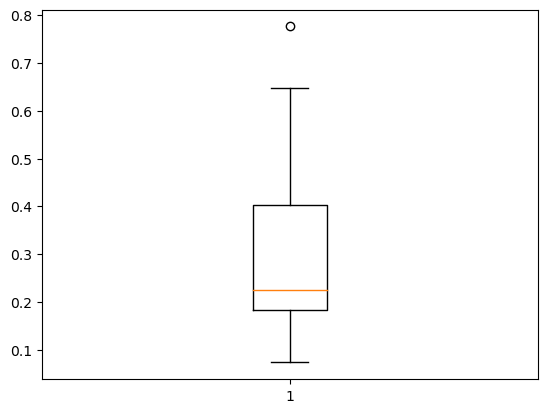

In [52]:
datar=(everythingr[(everythingr['Specific growth rate'] > 0) & (everythingr['Specific growth rate']<1)])
print (datar)
plt.boxplot(datar['Specific growth rate'])

In [47]:
allnotes=[]
excelname= dirname + 'ablation timepoints.xlsx'
for region in range (1,4):
    df = pd.DataFrame()
    sheet = pd.read_excel(excelname,index_col=5,sheet_name='R'+str(region))
    df['notes']=sheet.index
    allnotes.append(df)
allnotes=pd.concat(allnotes, ignore_index=True)
print(allnotes)

      notes
0       NaN
1   divided
2       NaN
3   divided
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11  divided
12      NaN
13      NaN
14      NaN
15  Bad seg
16      NaN
17      NaN
18      NaN
19      NaN
20  divided
21      NaN
22  divided
23      NaN
24      NaN


In [48]:
everythingr['notes']=allnotes
print (everythingr)

     Vol_t0   Vol_t1   Vol_t2   Vol_t3    cellname  region  \
0   11766.0   9828.0   8550.0  10101.0           a       1   
1   13043.0  10691.0  10274.0   5878.0           b       1   
2   10751.0   9632.0   8865.0   6795.0           c       1   
3   13050.0  12150.0  12668.0   7442.0           d       1   
4    8872.0   8516.0   8162.0  10009.0           e       1   
5   11544.0  10470.0   7905.0  14039.0           f       1   
6    9718.0   8321.0   7026.0  11570.0           g       1   
7   10433.0      0.0      0.0      0.0   dead cell       1   
8   12522.0  21812.0  10546.0  11678.0           a       2   
9    8906.0   9548.0   8892.0  10541.0           b       2   
10   8693.0   9268.0   8041.0  11910.0           c       2   
11  25872.0  26345.0   9847.0   8284.0           d       2   
12  15978.0  15808.0  10162.0  14475.0           e       2   
13  10926.0  10887.0   9886.0  11831.0           f       2   
14  12590.0  12979.0  10884.0   8181.0           g       2   
15  1038

In [49]:
# Save the master spreadsheet
# @todo: construct the correct output_filename

everythingr.to_csv('ablation_cellvolumes')

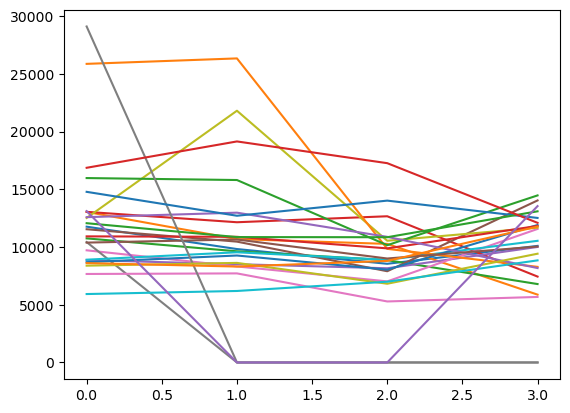

In [27]:
for i in range(1,4):
    plt.plot(volumes[i])

In [54]:

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from skimage import io, morphology, util, measure
from scipy.ndimage import convolve
import seaborn as sb
from os import path
from glob import glob

import pickle as pkl

from mamutUtils import sort_links_by_time, load_mamut_densely, construct_data_frame_dense

dirnames = {}
dirname = '/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region 1'

dx = 1
# dx = 0.146240234375


In [173]:
# Try to debug missing cells
everythingcr = []
excelname ='/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/ablation timepoints.xlsx'
dxlist = [0.146240234375, 1, 1]

dirnames = {}
dirname = '/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region 1'

dx = dxlist[k-1]
#%% Export the coordinates of all tracked cells (as pickle)
cycling_tracks, cycling_links, cycling_spots = load_mamut_densely(dirname,subdir_str='')
tracks = construct_data_frame_dense(cycling_tracks, cycling_links, cycling_spots)

print(cycling_spots[2])

    LABEL    ID  TRACK_ID  QUALITY  POSITION_X  POSITION_Y  POSITION_Z  \
5  ID4781  4781         2     -1.0   35.721170   29.082018    53.79090   
6  ID4778  4778         2     -1.0   35.653145   30.374486    51.72508   

   POSITION_T  FRAME    RADIUS  ...  SOURCE_ID  MANUAL_SPOT_COLOR  \
5         3.0      3  2.176291  ...          0                NaN   
6         2.0      2  2.176291  ...          0                NaN   

   MEAN_INTENSITY_CH1  MEDIAN_INTENSITY_CH1  MIN_INTENSITY_CH1  \
5        10578.785250               10694.0             4317.0   
6        15441.930837               16058.0             5047.0   

   MAX_INTENSITY_CH1  TOTAL_INTENSITY_CH1  STD_INTENSITY_CH1  CONTRAST_CH1  \
5            16223.0           27684681.0        1824.396038      0.295630   
6            23742.0           40411533.0        3554.529585      0.239506   

    SNR_CH1  
5  2.646147  
6  1.678873  

[2 rows x 22 columns]


In [164]:
everythingcr = []
excelname ='/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/ablation timepoints.xlsx'
dxlist = [0.146240234375, 1, 1]
for k in range (1,4):
    dirnames = {}
    dirname = '/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region '+str(k)

    dx = dxlist[k-1]
    #%% Export the coordinates of all tracked cells (as pickle)
    cycling_tracks, cycling_links, cycling_spots = load_mamut_densely(dirname,subdir_str='')
    tracks = construct_data_frame_dense(cycling_tracks, cycling_links, cycling_spots)

    with open(path.join(dirname,'dense_tracks.pkl'),'wb') as file:
        pkl.dump(tracks,file)

#%% Load parsed tracks, previous manual segtrack, additional segonly

# Load preliminary tracks
    with open(path.join(dirname,'dense_tracks.pkl'),'rb') as file:
        tracks = pkl.load(file)

    segonly = []
    for t in range(4):
        segonly.append(io.imread(path.join(dirname,f't{t}_cp_masks.tif')))
    segonly = np.stack(segonly)

    segtrack = np.zeros_like(segonly,dtype=np.int16)
    radius = 5

    [T,Z,X,Y] = segtrack.shape


# Filter segmentation based on complete tracksvi
    trackID = 0
    for track in tracks:
    
        track['TrackID'] = trackID
        trackID += 1
        for idx,spot in track.iterrows():
            x = int(spot['X']/dx)
            y = int(spot['Y']/dx)
            z = int(np.round(spot['Z']))
            t = int(spot['Frame'])
        
        # If already loading manual, check that manual has tracks already at this frame
        # if so, skip this timepoint
            this_segtrack = segtrack[t,...]
        
            this_seg = segonly[t,...]
            label = this_seg[z,y,x]
        
            track.at[idx,'Segmentation'] = label
            track.at[idx,'New'] = True
        
            if label > 0:
            # filter¸segmentation image to only include tracked spots
                this_segtrack[this_seg == label] = trackID
            else:
            # Create a 'cube' around spots that are missing segmentations
            # print(f'Time {t} -- {i}: {ID}')
                y_low = max(0,y - radius); y_high = min(Y,y + radius)
                x_low = max(0,x - radius); x_high = min(X,x + radius)
                z_low = max(0,z - radius); z_high = min(Z,z + radius)
                this_segtrack[z_low:z_high, y_low:y_high, x_low:x_high] = trackID
            segtrack[t,...] = this_segtrack

    io.imsave(path.join('/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region '+str(k)+'/filtered_segmentation region '+str(k)+'.tif'),
          segtrack.astype(np.uint16))
    df=pd.DataFrame()
    data=io.imread('/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region '+str(k)+'/filtered_segmentation region '+str(k)+'.tif')
    for i in range (4):
        list=[]
        for label in range (1,np.max(data)):
            A=data==label
            B=(A.sum(axis=1).sum(axis=1).sum(axis=1))
            list.append(B[i])
        df ['Vol_t' + str(i)] = list
    notes = pd.read_excel(excelname,index_col=5,sheet_name='CR'+str(k))
    label=pd.read_excel(excelname,index_col=0,sheet_name='CR'+str(k))
    df['notes']=notes.index
    df ['Specific growth rate']=(df['Vol_t3'] - df['Vol_t2'])/df['Vol_t2']
    df['Region']= k
    df['Label']=label.index
    everythingcr.append(df)
everythingcr=pd.concat(everythingcr, ignore_index=True)
# @todo: add 'Notes' field
# @todo: Divide growth by the size at t2 -> Name this 'Specific growth rate"
print (everythingcr)

/var/folders/9m/3jf7y0_d46n0k2y2_q0xzdbr0000gn/T/ipykernel_23071/1973252290.py:67: UserWarning: /Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region 1/filtered_segmentation region 1.tif is a low contrast image
  io.imsave(path.join('/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region '+str(k)+'/filtered_segmentation region '+str(k)+'.tif'),
/var/folders/9m/3jf7y0_d46n0k2y2_q0xzdbr0000gn/T/ipykernel_23071/1973252290.py:67: UserWarning: /Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region 2/filtered_segmentation region 2.tif is a low contrast image
  io.imsave(path.join('/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region '+str(k)+'/filtered_segmentation region '+str(k)+'.tif'),
/var/folders/9m/3jf7y0_d46n0k2y2_q0xzdbr0000gn/T/ipykernel_23071/1973252290.py:67: UserWarning: /Users/aliyafisher/Library/CloudStor

    Vol_t0  Vol_t1  Vol_t2  Vol_t3               notes  Specific growth rate  \
0        0       0       0    5705             divided                   inf   
1        0       0    8083   14032                 NaN              0.735989   
2        0       0       0    9631        didn't track                   inf   
3        0       0       0    6740             divided                   inf   
4        0       0   10924       0             divided             -1.000000   
..     ...     ...     ...     ...                 ...                   ...   
79       0       0       0    8277             divided                   inf   
80       0       0       0    7697        didn't track                   inf   
81       0       0       0    9453        didn't track                   inf   
82       0       0   15853   11241  fixed segmentation             -0.290923   
83       0       0       0    7354        didn't track                   inf   

    Region  Label  
0        1      1  

In [163]:
everythingcr = []
excelname ='/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/ablation timepoints.xlsx'
dxlist = [0.146240234375, 1, 1]
for k in range (1,4):
    df=pd.DataFrame()
    data=io.imread('/Users/aliyafisher/Library/CloudStorage/OneDrive-Stanford/07-17-2023 Ablation test/Control Region '+str(k)+'/filtered_segmentation region '+str(k)+'.tif')
    for i in range (4):
        list=[]
        for label in range (1,np.max(data)):
            A=data==label
            B=(A.sum(axis=1).sum(axis=1).sum(axis=1))
            list.append(B[i])
        df ['Vol_t' + str(i)] = list
    notes = pd.read_excel(excelname,index_col=5,sheet_name='CR'+str(k))
    label=pd.read_excel(excelname,index_col=0,sheet_name='CR'+str(k))
    df['Label']=label.index
    df['Region']= k
    df['Label']=label.index
    df['notes']=notes.index
    df ['Specific growth rate']=(df['Vol_t3'] - df['Vol_t2'])/df['Vol_t2']
    everythingcr.append(df)
everythingcr=pd.concat(everythingcr, ignore_index=True)
# @todo: add 'Notes' field
# @todo: Divide growth by the size at t2 -> Name this 'Specific growth rate"
print (everythingcr)

    Vol_t0  Vol_t1  Vol_t2  Vol_t3  Label  Region               notes  \
0        0       0       0    5705      1       1             divided   
1        0       0    8083   14032      2       1                 NaN   
2        0       0       0    9631      3       1        didn't track   
3        0       0       0    6740      4       1             divided   
4        0       0   10924       0      5       1             divided   
..     ...     ...     ...     ...    ...     ...                 ...   
79       0       0       0    8277     20       3             divided   
80       0       0       0    7697     21       3        didn't track   
81       0       0       0    9453     22       3        didn't track   
82       0       0   15853   11241     23       3  fixed segmentation   
83       0       0       0    7354     24       3        didn't track   

    Specific growth rate  
0                    inf  
1               0.735989  
2                    inf  
3              

In [155]:
datacr=everythingcr[(everythingcr['Specific growth rate']>0) & (everythingcr['Specific growth rate']<5)]

<function matplotlib.pyplot.show(close=None, block=None)>

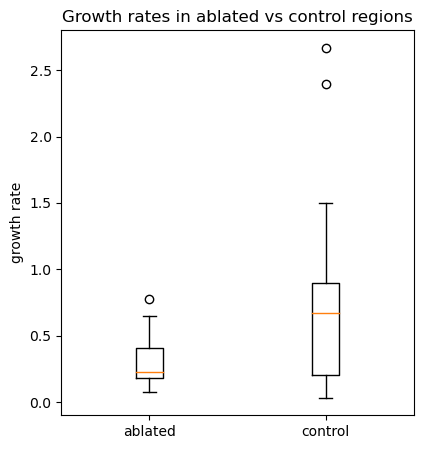

In [162]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.boxplot([datar['Specific growth rate'], datacr['Specific growth rate']])
plt.title('Growth rates in ablated vs control regions')
plt.xticks([1, 2], ['ablated', 'control'])
plt.ylabel('growth rate')

plt.subplot(1, 2, 1)  
plt.show

In [158]:
p_value

0.025552056244199508

In [113]:
import scipy.stats as stats

In [157]:
t_statistic, p_value = stats.ttest_ind(datar['Specific growth rate'], datacr['Specific growth rate'])

In [159]:
big= everythingcr[everythingcr['Specific growth rate']>1]

In [160]:
normal= everythingcr[everythingcr['Specific growth rate']<1]

In [161]:
normal

,Vol_t0,Vol_t1,Vol_t2,Vol_t3,Label,Region,notes,Specific growth rate
1,0,0,8083,14032,2,1,NaN,0.735989
4,0,0,10924,0,5,1,divided,-1.000000
10,0,0,15656,9126,11,1,segmentation fixed,-0.417092
12,0,0,8962,15521,13,1,NaN,0.731868
13,0,0,8964,14302,14,1,NaN,0.595493
14,0,0,4979,8135,15,1,segmentation fixed,0.633862
17,0,0,9311,9671,18,1,NaN,0.038664
19,0,0,8303,9944,20,1,NaN,0.197639
22,0,0,9174,9463,23,1,didn't track,0.031502
26,0,0,7900,0,27,1,divided,-1.000000


In [130]:
big

,Vol_t0,Vol_t1,Vol_t2,Vol_t3,notes,Specific growth rate,Region,Label
0,0,0,0,5705,divided,inf,1,1
2,0,0,0,9631,didn't track,inf,1,3
3,0,0,0,6699,divided,inf,1,4
5,0,0,0,9004,divided,inf,1,6
6,0,0,0,8002,divided,inf,1,7
7,0,0,0,17808,didn't track,inf,1,8
8,0,0,0,9506,didn't track,inf,1,9
11,0,0,0,18963,didn't track,inf,1,12
15,0,0,0,10018,didn't track,inf,1,16
16,0,0,0,9928,didn’t track,inf,1,17
